## The objective of this analysis is to get insights from the 4 football/soccer seasons played in Premier League between 2019 - 2023.


In [ ]:
# Importing respective libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from dateutil.relativedelta import relativedelta

In [ ]:
# Ignoring irrelevant warnings and creating pandas dataframe

warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/luiismuro/Data-Analysis-Projects/refs/heads/main/player_injuries_impact.csv', na_values = 'N.A.')

In [ ]:
# Schema

df.head(n=5)

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
0,Jamaal Lascelles,Newcastle,Center Back,26,2019/20,77,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1.0,7.1,draw,Everton,0.0,6.2,draw,Norwich City,0.0,6.7
1,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0.0,6(S),lose,Arsenal,-4.0,NaN,lose,Crystal Palace,-1.0,6.5
3,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Shoulder injury,"Jul 16, 2020","Sep 28, 2020",lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Dummett,Newcastle,Center Back,28,2019/20,75,Groin injury,"Dec 22, 2019","Jan 10, 2020",win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating Injury duration column by calculating date of injury + date of return

df['Date of Injury'] = pd.to_datetime(df['Date of Injury'], errors='coerce')
df['Date of return'] = pd.to_datetime(df['Date of return'], errors='coerce')

# df['Date of Injury'] = df['Date of Injury'].dt.date
# df['Date of return'] = df['Date of return'].dt.date

print(df[['Date of Injury', 'Date of return']].head(n=5))

  Date of Injury Date of return
0     2019-11-09     2020-01-13
1     2019-10-20     2019-11-24
2     2020-01-02     2020-01-17
3     2020-07-16     2020-09-28
4     2019-12-22     2020-01-10


In [ ]:
# Calculating duration of injury with a function

def calculate_injury_duration(row):
    start_date = row['Date of Injury']
    end_date = row['Date of return']

# Checking valid dates
    if pd.isna(start_date) or pd.isna(end_date):
        return "Invalid or Missing Dates"

# Ensuring that end is higher or equal to start_date
    if end_date < start_date:
        return "End date earlier than date"

# Calculating the difference
    diff = relativedelta(start_date, end_date)
    parts = []
    if diff.years > 0:
        parts.append(f"{diff.years} years")
    if diff.months > 0:
        parts.append(f"{diff.months} months")
    if diff.days > 0:
        parts.append(f"{diff.days} days")

    return ", ".join(parts)

In [ ]:
# Calling function above

df.apply(calculate_injury_duration, axis=1)

,0
0,
1,
2,
3,
4,
...,...
651,
652,Invalid or Missing Dates
653,
654,


In [ ]:
 # File structure - rows and columns qtt.

df.shape

(656, 42)

In [ ]:
# Analysis eg.: Statistic description of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,656.0,26.661585,3.580028,18.0,24.0,27.0,29.0,39.0
FIFA rating,656.0,78.576220,4.108117,66.0,76.0,79.0,81.0,90.0
Match1_before_injury_GD,591.0,0.211506,1.987487,-6.0,-1.0,0.0,1.0,9.0
Match2_before_injury_GD,555.0,0.131532,1.937376,-5.0,-1.0,0.0,1.0,9.0
Match3_before_injury_GD,499.0,0.000000,1.961476,-7.0,-1.0,0.0,1.0,8.0
Match1_missed_match_GD,654.0,-0.088685,1.894158,-5.0,-1.0,0.0,1.0,5.0
Match2_missed_match_GD,481.0,-0.033264,1.870532,-5.0,-1.0,0.0,1.0,8.0
Match3_missed_match_GD,371.0,0.221024,1.877229,-5.0,-1.0,0.0,1.0,5.0
Match1_after_injury_GD,515.0,0.110680,1.902636,-5.0,-1.0,0.0,1.0,6.0
Match2_after_injury_GD,490.0,0.134694,1.931924,-7.0,-1.0,0.0,1.0,8.0


In [ ]:
# Last Rows

df.tail(n=5)

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
651,James Garner,Everton,Defensive Midfielder,21,2022/23,72,back injury,2022-11-12,2023-02-09,lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,Dwight McNeil,Everton,Left winger,23,2023/24,76,ankle injury,NaT,2023-09-01,NaN,...,0.0,6(S),lose,Arsenal,-1.0,5.4,win,Brentford,2.0,7.6
653,Ashley Young,Everton,Left Back,38,2023/24,75,muscle injury,2023-12-11,2024-01-25,win,...,0.0,5.6,draw,Tottenham,0.0,6.3,lose,Man City,-2.0,5.2
654,Jack Harrison,Everton,Right winger,26,2023/24,76,hip injury,2023-07-01,2023-09-21,NaN,...,-1.0,6.5(S),win,Bournemouth,3.0,8.5,lose,Liverpool,-2.0,5.4
655,Beto,Everton,Center Forward,25,2023/24,81,knee injury,2023-11-23,2023-11-28,win,...,1.0,5.7,win,Chelsea,2.0,5.8,lose,Tottenham,-1.0,6(S)


In [ ]:
# Dataframe info - categorical and numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                656 non-null    object 
 1   Team Name                           656 non-null    object 
 2   Position                            656 non-null    object 
 3   Age                                 656 non-null    int64  
 4   Season                              656 non-null    object 
 5   FIFA rating                         656 non-null    int64  
 6   Injury                              656 non-null    object 
 7   Date of Injury                      573 non-null    object 
 8   Date of return                      568 non-null    object 
 9   Match1_before_injury_Result         591 non-null    object 
 10  Match1_before_injury_Opposition     591 non-null    object 
 11  Match1_before_injury_GD             591 non-n

In [ ]:
# Checking missing data per columns

df.isna().any()

,0
Name,False
Team Name,False
Position,False
Age,False
Season,False
FIFA rating,False
Injury,False
Date of Injury,True
Date of return,True
Match1_before_injury_Result,True


In [ ]:
# Missing data per columns - Count

df.isna().sum()

,0
Name,0
Team Name,0
Position,0
Age,0
Season,0
FIFA rating,0
Injury,0
Date of Injury,83
Date of return,88
Match1_before_injury_Result,65


In [ ]:
# Selecting numeric columns

df_num = df.select_dtypes(include=[np.number])
df_num

,Age,FIFA rating,Match1_before_injury_GD,Match2_before_injury_GD,Match3_before_injury_GD,Match1_missed_match_GD,Match2_missed_match_GD,Match3_missed_match_GD,Match1_after_injury_GD,Match2_after_injury_GD,Match3_after_injury_GD
0,26,77,0.0,1.0,1.0,-2.0,0.0,2.0,1.0,0.0,0.0
1,28,79,-5.0,1.0,-1.0,0.0,1.0,1.0,NaN,NaN,NaN
2,28,79,-3.0,-1.0,-3.0,0.0,NaN,NaN,0.0,-4.0,-1.0
3,28,79,-5.0,-1.0,-2.0,0.0,-2.0,NaN,NaN,NaN,NaN
4,28,75,2.0,-1.0,1.0,-3.0,-1.0,-3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
651,21,72,-2.0,0.0,-1.0,-3.0,-1.0,0.0,NaN,NaN,NaN
652,23,76,NaN,NaN,NaN,-1.0,-4.0,-1.0,0.0,-1.0,2.0
653,38,75,2.0,3.0,1.0,2.0,-1.0,-2.0,0.0,0.0,-2.0
654,26,76,NaN,NaN,NaN,-4.0,-1.0,0.0,-1.0,3.0,-2.0


In [ ]:
# Selecting categorical columns

df_obj = df.select_dtypes(include=[object])
df_obj

,Name,Team Name,Position,Season,Injury,Date of Injury,Date of return,Match1_before_injury_Result,Match1_before_injury_Opposition,Match1_before_injury_Player_rating,...,Match3_missed_match_Opposition,Match1_after_injury_Result,Match1_after_injury_Opposition,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_Player_rating
0,Jamaal Lascelles,Newcastle,Center Back,2019/20,Knee injury,2019-11-09,2020-01-13,draw,Wolves,7.4,...,Sheffield,win,Chelsea,7.1,draw,Everton,6.2,draw,Norwich City,6.7
1,Fabian Schär,Newcastle,Center Back,2019/20,Knee injury,2019-10-20,2019-11-24,lose,Leicester,5.8,...,Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fabian Schär,Newcastle,Center Back,2019/20,Hamstring strain,2020-01-02,2020-01-17,lose,Man United,4.9,...,NaN,draw,Everton,6(S),lose,Arsenal,NaN,lose,Crystal Palace,6.5
3,Fabian Schär,Newcastle,Center Back,2019/20,Shoulder injury,2020-07-16,2020-09-28,lose,Man City,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Dummett,Newcastle,Center Back,2019/20,Groin injury,2019-12-22,2020-01-10,win,Southampton,5.8,...,Leicester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,James Garner,Everton,Defensive Midfielder,2022/23,back injury,2022-11-12,2023-02-09,lose,Leicester,6,...,Man City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,Dwight McNeil,Everton,Left winger,2023/24,ankle injury,NaT,2023-09-01,NaN,NaN,NaN,...,Wolves,draw,Sheffield,6(S),lose,Arsenal,5.4,win,Brentford,7.6
653,Ashley Young,Everton,Left Back,2023/24,muscle injury,2023-12-11,2024-01-25,win,Chelsea,6.1,...,Man City,draw,Fulham,5.6,draw,Tottenham,6.3,lose,Man City,5.2
654,Jack Harrison,Everton,Right winger,2023/24,hip injury,2023-07-01,2023-09-21,NaN,NaN,NaN,...,Sheffield,lose,Luton Town,6.5(S),win,Bournemouth,8.5,lose,Liverpool,5.4


In [ ]:
# Counting null data

df.isnull().sum()

,0
Name,0
Team Name,0
Position,0
Age,0
Season,0
FIFA rating,0
Injury,0
Date of Injury,83
Date of return,88
Match1_before_injury_Result,65


In [ ]:
# Removing null data

df = df.dropna()

In [ ]:
# Counting how many times each name appear on this dataset

df['Name'].value_counts()

,count
Name,
Callum Wilson,5
Raphael Varane,4
Luke Shaw,4
Abdoulaye Doucouré,3
Allan Saint-Maximin,3
...,...
David Raya,1
Ethan Pinnock,1
Christian Norgaard,1


In [ ]:
# Unique positions count

df['Position'].unique()

array(['Center Back', 'Right Midfielder', 'Center Forward',
       'Central Midfielder', 'Left winger', 'Right winger',
       'Defensive Midfielder', 'Left Back', 'Right Back',
       'Attacking Midfielder', 'Goalkeeper', 'Defensive Midfielder '],
      dtype=object)

In [ ]:
# Name of players

df['Name'].unique()


array(['Jamaal Lascelles', 'Ciaran Clark', 'Matt Ritchie', 'Dwight Gayle',
       'Jonjo Shelvey', 'Allan Saint-Maximin', 'Callum Wilson',
       'Miguel Almirón', 'Bruno Guimarães', 'Joelinton', 'Sean Longstaff',
       'Joe Willock', 'Dan Burn', 'Alexander Isak', 'Harvey Barnes',
       'Kieran Tierney', 'Héctor Bellerín', 'Gabriel Martinelli',
       'Pablo Marí', 'Pierre-Emerick Aubameyang', 'Thomas Partey',
       'Oleksandr Zinchenko', 'Gabriel Jesus', 'Takehiro Tomiyasu',
       'Tyrone Mings', 'Douglas Luiz', 'Ross Barkley', 'Lucas Digne',
       'acob Ramsey', 'Ezri Konsa', 'Youri Tielemans', 'Pau Torres',
       'Harry Maguire', 'Eric Bailly', 'Luke Shaw', 'Nemanja Matic',
       'Paul Pogba', 'Scott McToMinay', 'Fred', 'Marcus Rashford',
       'Mason Greenwood', 'Anthony Martial', 'Donny Van De Beek',
       'Edinson Cavani', 'Raphael Varane', 'Christian Eriksen',
       'Jadon Sancho', 'David Raya', 'Kristoffer Ajer', 'Ethan Pinnock',
       'Christian Norgaard', 'Vitaly J

In [ ]:
print(df['Position'].value_counts())

Position
Center Forward           24
Central Midfielder       24
Center Back              23
Left Back                13
Left winger               9
Defensive Midfielder      9
Right winger              7
Right Back                5
Attacking Midfielder      3
Goalkeeper                3
Defensive Midfielder      2
Right Midfielder          1
Name: count, dtype: int64


In [ ]:
print(df['Position'].isnull().sum())  # Confirming if no Nan Values is present in 'Position' column

0


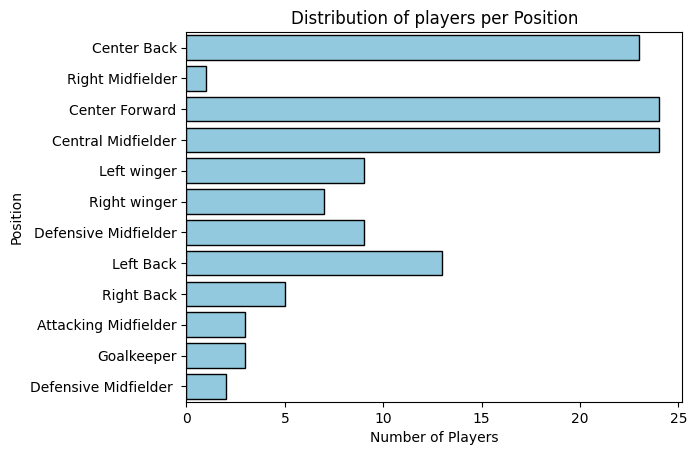

In [ ]:
# Distribution of players per position

positions = ['Center Back', 'Right Midfielder', 'Center Forward',
       'Central Midfielder', 'Left winger', 'Right winger',
       'Defensive Midfielder', 'Left Back', 'Right Back',
       'Attacking Midfielder', 'Goalkeeper', 'Defensive Midfielder ']

sns.countplot(
    y='Position',
    data=df,
    edgecolor='black',
    color='skyblue',
    order=positions
)

plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.title('Distribution of players per Position')
plt.show()

In [ ]:
# Checking if there are duplicated data
df.duplicated().sum()

0

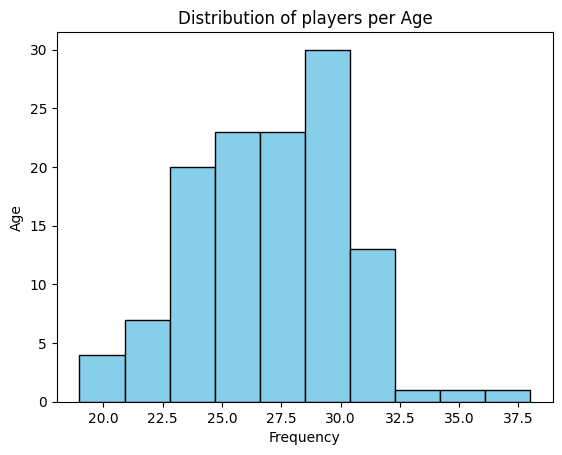

In [ ]:
# Distribution of players per age

df['Age'].plot(kind='hist', color='skyblue', edgecolor='black')
plt.title('Distribution of players per Age')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

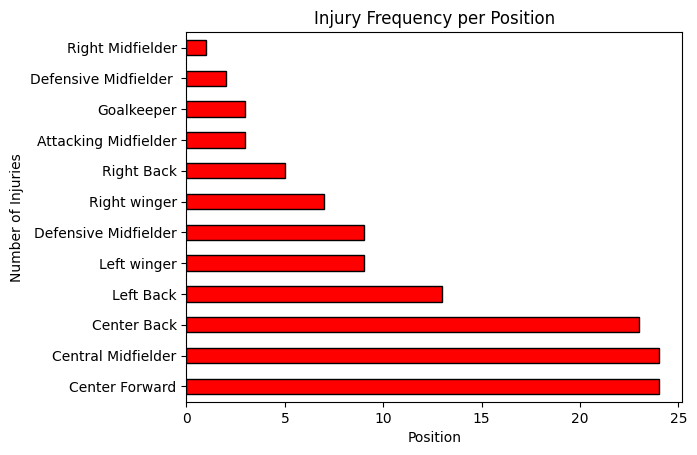

In [ ]:
# Injury frequency by position

df['Position'].value_counts().plot(kind='barh', color='red', edgecolor='black')
plt.title('Injury Frequency per Position')
plt.xlabel('Position')
plt.ylabel('Number of Injuries')

plt.show()


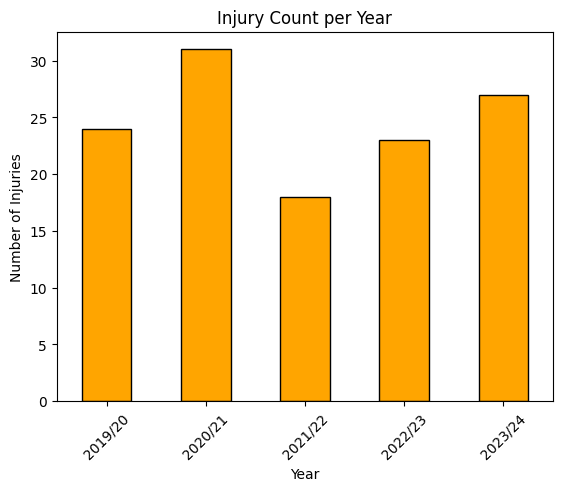

In [ ]:
# Injury count per year

# Ordering Data Frame by season
df_sorted = df.sort_values(by='Season', ascending=True)

# Counting injuries per year
injury_counts = df_sorted['Season'].value_counts().sort_index()

# Ploting graphic
injury_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Injury Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encoding labels/columns to provide data for training.
label_encoders = {}

# Changing categorical columns into numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    original_values = df[column].unique()
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

    encoded_values = df[column].unique()
    decoded_values = label_encoders[column].inverse_transform(encoded_values)

    print(f"\n{column} Encoding and Decoding: ")
    for enc, dec in zip(encoded_values, decoded_values):
      print(f"{enc} - {dec}")


Name Encoding and Decoding: 
40 - Jamaal Lascelles
19 - Ciaran Clark
59 - Matt Ritchie
25 - Dwight Gayle
44 - Jonjo Shelvey
4 - Allan Saint-Maximin
14 - Callum Wilson
60 - Miguel Almirón
12 - Bruno Guimarães
43 - Joelinton
75 - Sean Longstaff
42 - Joe Willock
20 - Dan Burn
2 - Alexander Isak
36 - Harvey Barnes
51 - Kieran Tierney
37 - Héctor Bellerín
34 - Gabriel Martinelli
67 - Pablo Marí
70 - Pierre-Emerick Aubameyang
78 - Thomas Partey
66 - Oleksandr Zinchenko
33 - Gabriel Jesus
77 - Takehiro Tomiyasu
79 - Tyrone Mings
24 - Douglas Luiz
73 - Ross Barkley
53 - Lucas Digne
83 - acob Ramsey
30 - Ezri Konsa
82 - Youri Tielemans
68 - Pau Torres
35 - Harry Maguire
27 - Eric Bailly
54 - Luke Shaw
64 - Nemanja Matic
69 - Paul Pogba
74 - Scott McToMinay
32 - Fred
56 - Marcus Rashford
57 - Mason Greenwood
7 - Anthony Martial
23 - Donny Van De Beek
26 - Edinson Cavani
71 - Raphael Varane
17 - Christian Eriksen
39 - Jadon Sancho
21 - David Raya
52 - Kristoffer Ajer
29 - Ethan Pinnock
18 - Chri

In [ ]:
df.columns.tolist()

['Name',
 'Team Name',
 'Position',
 'Age',
 'Season',
 'FIFA rating',
 'Injury',
 'Date of Injury',
 'Date of return',
 'Match1_before_injury_Result',
 'Match1_before_injury_Opposition',
 'Match1_before_injury_GD',
 'Match1_before_injury_Player_rating',
 'Match2_before_injury_Result',
 'Match2_before_injury_Opposition',
 'Match2_before_injury_GD',
 'Match2_before_injury_Player_rating',
 'Match3_before_injury_Result',
 'Match3_before_injury_Opposition',
 'Match3_before_injury_GD',
 'Match3_before_injury_Player_rating',
 'Match1_missed_match_Result',
 'Match1_missed_match_Opposition',
 'Match1_missed_match_GD',
 'Match2_missed_match_Result',
 'Match2_missed_match_Opposition',
 'Match2_missed_match_GD',
 'Match3_missed_match_Result',
 'Match3_missed_match_Opposition',
 'Match3_missed_match_GD',
 'Match1_after_injury_Result',
 'Match1_after_injury_Opposition',
 'Match1_after_injury_GD',
 'Match1_after_injury_Player_rating',
 'Match2_after_injury_Result',
 'Match2_after_injury_Opposition',